<a href="https://colab.research.google.com/github/Sulaiman-Nedal/Voromesh/blob/main/Voromesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt


In [2]:
# Function to calculate VoroLoss
def voro_loss(voronoi_diagram, target_points):
    loss = 0
    for point in target_points:
        min_dist = float('inf')
        for ridge_point in voronoi_diagram.ridge_points:
            v0 = voronoi_diagram.points[ridge_point[0]]
            v1 = voronoi_diagram.points[ridge_point[1]]
            mid_point = (v0 + v1) / 2
            dist = np.linalg.norm(point - mid_point)
            if dist < min_dist:
                min_dist = dist
        loss += min_dist ** 2
    return loss

Initial VoroLoss: 0.1875
Optimized VoroLoss: 0.8450000000000002


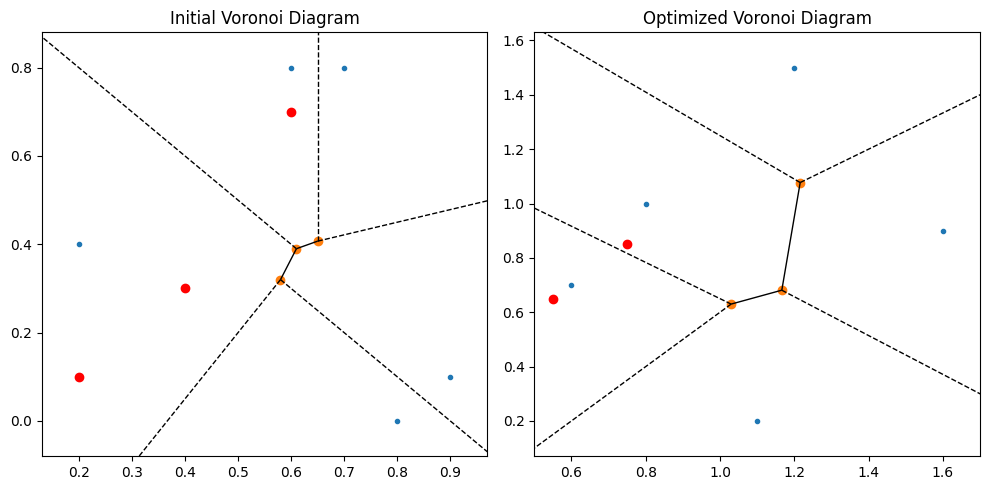

In [4]:


# Densely sample a set of points from a ground truth surface mesh(V, F);
target_points = np.array([
    [0.15, 0.25],
    [0.35, 0.45],
    [0.55, 0.65],
    [0.75, 0.85]
])



# Example points (Generators)
Generators = np.array([
    [0.2, 0.4],
    [0.6, 0.8],
    [0.8, 0.0],
    [0.7, 0.8],
    [0.9, 0.1]
])

# Create and display Voronoi diagram
voronoi_diagram = Voronoi(Generators)


# Create random move points
move_points=np.array([
    [0.4, 0.3],
    [0.6, 0.7],
    [0.8, 0.9],
    [0.1, 0.2],
    [0.2, 0.1],
])


# Calculate initial VoroLoss
initial_loss = voro_loss(voronoi_diagram, target_points)
print("Initial VoroLoss:", initial_loss)

# Optimization step (example: moving points slightly to minimize loss)
optimized_points = Generators + move_points

# Recalculate Voronoi and loss after optimization
vor_optimized = Voronoi(optimized_points)

optimized_loss = voro_loss(vor_optimized, target_points)

print("Optimized VoroLoss:", optimized_loss)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the initial Voronoi diagram
voronoi_plot_2d(voronoi_diagram, ax=axs[0])
axs[0].scatter(move_points[:, 0], move_points[:, 1], color='red', label='Points to be approximated')
axs[0].set_title("Initial Voronoi Diagram")


# Plot the optimized Voronoi diagram
voronoi_plot_2d(vor_optimized, ax=axs[1])
axs[1].scatter(target_points[:, 0], target_points[:, 1], color='red', label='Target Points')
axs[1].set_title("Optimized Voronoi Diagram")

# Adjust layout and display
plt.tight_layout()
plt.show()